In [1]:
import umap
import numpy as np
import pandas as pd

import jscatter 

import matplotlib.pyplot as plt

import humap
from datasets import load_dataset

import time



In [2]:
# N = 744469 #600_000

# indices = np.random.choice(744469, N, replace=False).tolist()
# print("loading dataset")
# sentence_embeddings = np.load("./../datasets/gpt4all-j-prompts.npy")[indices]
# print(sentence_embeddings.shape)

In [3]:
# groovy = load_dataset('nomic-ai/gpt4all-j-prompt-generations', revision='v1.3-groovy')

# docs = groovy['train']['prompt']

# documents = []
# for i in range(len(indices)):
#     documents.append(docs[indices[i]])
# del docs



In [2]:
# # datasets consisting of prompts
# dataset = pd.read_csv('./../datasets/gpt4all-prompts.csv')
# # dataset = pd.read_csv('./../datasets/augmented_reviews.csv')
# # documents = dataset['review']

# sentence_embeddings = np.load("./../datasets/gpt4all-prompts.npy")
# # sentence_embeddings = np.load('./../datasets/reviews_embeddings.npy')

# # N = sentence_embeddings.shape[0]
# sentence_embeddings.shape

In [3]:
%%time
import pickle 


with open('./../datasets/arxiv_titles/embeddings_0.pkl', 'rb') as f:
    data0 = pickle.load(f)
with open('./../datasets/arxiv_titles/embeddings_1.pkl', 'rb') as f:
    data1 = pickle.load(f)
with open('./../datasets/arxiv_titles/embeddings_2.pkl', 'rb') as f:
    data2 = pickle.load(f)

print("appending...")
data = data0+data1+data2
del data0
del data1
del data2

print("separating...")
documents = [d[0] for d in data]
sentence_embeddings = np.array([d[1] for d in data])
del data


appending...
separating...
CPU times: user 4.55 s, sys: 9.59 s, total: 14.1 s
Wall time: 40.9 s


In [4]:
N = 100000
indices = np.random.choice(sentence_embeddings.shape[0], N, replace=False).tolist()

In [6]:
documents = np.array(documents)[indices]

In [7]:
sentence_embeddings = sentence_embeddings[indices]

In [8]:
documents[:10]

array(['The Carbon Content of Intergalactic Gas at z=4.25 and its Evolution\n  Toward z=2.4',
       'On the Stability of the CMC Clifford Tori as Constrained Willmore\n  Surfaces',
       'Stop-mass prediction in naturalness scenarios within MSSM-25',
       'Eta-nuclear bound states revisited',
       'On the space of light rays of a space-time and a reconstruction theorem\n  by Low',
       'On cyclic associative Abel-Grassman groupoids',
       'Saddle solutions for the fractional Choquard equation',
       'Genus and fibredness of certain three-bridge links',
       'Quench-induced dynamical phase transitions and $\\pi$-synchronization in\n  the Bose-Hubbard Model',
       'On construction of multivariate symmetric MRA-based wavelets'],
      dtype='<U382')

In [9]:
sentence_embeddings.shape

(100000, 768)

In [7]:
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

# sentence_embeddings = PCA(n_components=0.9).fit_transform(sentence_embeddings)
# sentence_embeddings.shape

(2250000, 256)

In [10]:
print("creating humap object")
hUmap = humap.HUMAP(np.array([0.2, 0.2]), init="Random")
# hUmap = humap.HUMAP(np.array([0.2, 0.2]), init="Random")

print("fitting hierarchy")
tic = time.time()
y = np.zeros(sentence_embeddings.shape[0])
hUmap.fit(sentence_embeddings, y)
toc = time.time()



creating humap object
fitting hierarchy
Level 0 with 100000 data samples.
Fitting the first hierarchy level... 

L0 - Fitting: done in 97.302376 seconds.

Level 1: 20000 data samples.
Computing random walks for sampling selection... 


L1 - Selecting Landmarks: done in 0.915650 seconds.

Computing random walks for constucting representation neighborhood... 


L1 - Constructing Neighborhood: done in 6.473015 seconds.

Computing similarity among landmarks... 

Similarity between landmarks: 0.532634 seconds.

Computing sparse similarity... 

Creating sparse matrix... 


L1 - Sparse Similarity: done in 0.230738 seconds.

Fitting the hierarchy level... 


L1 - Fitting: done in 0.326557 seconds.

Associating data points to landmarks... 


L1 - Performing association to landmarks: done in 0.088771 seconds.


L1 - Construction: done in 8.876469


Level 2: 4000 data samples.
Computing random walks for sampling selection... 


L2 - Selecting Landmarks: done in 0.061253 seconds.

Computing random

In [11]:
embedding2 = hUmap.transform(2)

Initiating low-dimensional representation...

done in 0.008553 seconds.

Embedding level 2 with 4000 data samples.


	completed 0/500 epochs

	completed 50/500 epochs

	completed 100/500 epochs

	completed 150/500 epochs

	completed 200/500 epochs

	completed 250/500 epochs

	completed 300/500 epochs

	completed 350/500 epochs

	completed 400/500 epochs

	completed 450/500 epochs

	completed 500 epochs


EMBEDDING: Done in3.065706seconds.



In [12]:
hUmap.set_fixing_term(0.01)
hUmap.fix_datapoints(embedding2)
embedding1 = hUmap.transform(1)

Initiating low-dimensional representation...

done in 0.006401 seconds.

Embedding level 1 with 20000 data samples.


	completed 0/500 epochs

	completed 50/500 epochs

	completed 100/500 epochs

	completed 150/500 epochs

	completed 200/500 epochs

	completed 250/500 epochs

	completed 300/500 epochs

	completed 350/500 epochs

	completed 400/500 epochs

	completed 450/500 epochs

	completed 500 epochs


EMBEDDING: Done in16.621893seconds.



In [13]:
hUmap.set_fixing_term(0.01)
hUmap.fix_datapoints(embedding1)
embedding = hUmap.transform(0)

Initiating low-dimensional representation...

done in 0.022608 seconds.

Embedding level 0 with 100000 data samples.


	completed 0/500 epochs

	completed 50/500 epochs

	completed 100/500 epochs

	completed 150/500 epochs

	completed 200/500 epochs

	completed 250/500 epochs

	completed 300/500 epochs

	completed 350/500 epochs

	completed 400/500 epochs

	completed 450/500 epochs

	completed 500 epochs


EMBEDDING: Done in60.808681seconds.



In [14]:
original_indices2 = hUmap.original_indices(2)

In [15]:
original_indices1 = hUmap.original_indices(1)

In [17]:
documents2 = []
for i in range(len(original_indices2)):
    documents2.append(documents[original_indices2[i]])


In [18]:
documents1 = []
for i in range(len(original_indices1)):
    documents1.append(documents[original_indices1[i]])


In [19]:
# palette = sns.color_palette('viridis', clusterer.labels_.max()).as_hex()

# labels = clusterer.labels_+1



df2 = pd.DataFrame({   
    'id': np.arange(len(embedding2)),
    'x': embedding2[:, 0],
    'y': embedding2[:, 1],
    'document': documents2,
    'labels': y[hUmap.original_indices(2)],
    'original_indices': original_indices2,
})

df1 = pd.DataFrame({    
    'id': np.arange(len(embedding1)),
    'x': embedding1[:, 0],
    'y': embedding1[:, 1],
    'document': documents1,
    'labels': y[hUmap.original_indices(1)],
    'original_indices': original_indices1,
})

df = pd.DataFrame({    
    'id': np.arange(len(y)),
    'x': embedding[:, 0],
    'y': embedding[:, 1],
    'document': documents,
    'labels': y,
    'original_indices': np.arange(len(y)),
})


In [17]:
df.to_csv('l0.csv', index=False)
df1.to_csv('l1.csv', index=False)
df2.to_csv('l2.csv', index=False)

In [21]:
config = dict(
    background_color='#FFFFFF',
    color_by='labels',
    color_map=['#000000', '#f57e42'] #+ palette#['#FFFF00', '#1CE6FF', '#FF34FF', '#FF4A46', '#008941', '#006FA6', '#A30059', '#FFDBE5', '#7A4900', '#0000A6']
)

scatter = jscatter.Scatter(data=df, x='x', y='y', **config)

In [23]:
scatter.show()

In [28]:
df.loc[scatter.selection()][['document']].head(60)

,document
19654,Acceleration of Lamplighter Random Walks
44004,Random walk on disordered networks
59978,On the Optimal Shape of Tree Roots and Branches
31474,Strolling through Paradise
39987,Cutting edges at random in large recursive trees
16966,The random walk on the random connection model
74376,The Random Walk Metropolis: Linking Theory and...
54390,Discrete-time random walks and L\'evy flights ...
41237,The slow regime of randomly biased walks on trees
66551,Random Walks on Stochastic Temporal Networks


In [20]:
config = dict(
    background_color='#FFFFFF',
    color_by='labels',
    color_map=['#000000', '#f57e42'] #+ palette#['#FFFF00', '#1CE6FF', '#FF34FF', '#FF4A46', '#008941', '#006FA6', '#A30059', '#FFDBE5', '#7A4900', '#0000A6']
)

scatter = jscatter.Scatter(data=df, x='x', y='y', **config)
scatter1 = jscatter.Scatter(data=df1, x='x', y='y', **config)
scatter2 = jscatter.Scatter(data=df2, x='x', y='y', **config)

jscatter.link([scatter2, scatter1, scatter], rows=1, row_height=640, match_by='original_indices')

GridBox(children=(HBox(children=(VBox(children=(Button(button_style='primary', icon='arrows', layout=Layout(wi…

In [33]:
df2 = pd.DataFrame({   
    'id': np.arange(len(embedding2)),
    'x': embedding2[:, 0],
    'y': embedding2[:, 1],
    'document': documents2,
    'labels': reviewed[hUmap.original_indices(2)],
    'original_indices': original_indices2,
})
df2.to_csv('level2.csv', index=False)

In [1]:
import jscatter
import pandas as pd

df2 = pd.read_csv('level2.csv')

config = dict(
    background_color='#FFFFFF',
    color_by='labels',
    height=800,
    color_map=['#4287f5', '#f57e42'] #+ palette#['#FFFF00', '#1CE6FF', '#FF34FF', '#FF4A46', '#008941', '#006FA6', '#A30059', '#FFDBE5', '#7A4900', '#0000A6']
)

In [2]:
scatter2 = jscatter.Scatter(data=df2, x='x', y='y')
scatter2.color(by='labels')
scatter2.height(480)
scatter2.background('black')
scatter2.show()

In [10]:
df2.iloc[scatter2.selection()]

,id,x,y,document,labels,original_indices
24490,24490,6.625843,0.732435,great social app,0,1168078
33272,33272,6.654729,0.769761,Good social app,0,1167549
32360,32360,6.687142,0.798526,Great social app,0,1168077
21642,21642,6.638833,0.750812,Great social app,0,1168059
53890,53890,6.643660,0.743374,very nice social app,0,1165934
...,...,...,...,...,...,...
49699,49699,6.525607,0.619365,I think this is best social media app I like i...,0,1164475
19283,19283,6.551891,0.619656,Very good social media App,0,1163777
14960,14960,6.549971,0.607071,Amazing social media app,0,1162823
37436,37436,6.557255,0.623509,Great social media app,0,1163920


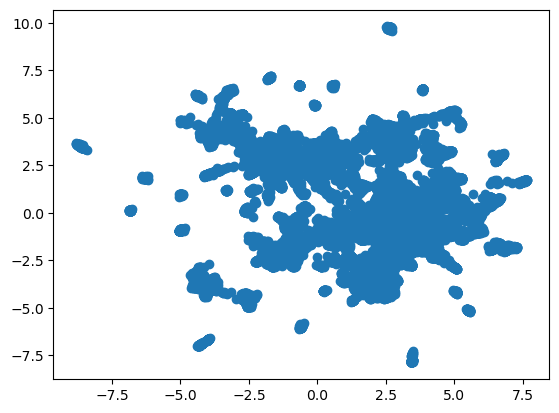

In [9]:
import matplotlib.pyplot as plt

plt.scatter(df2['x'], df2['y'])

In [20]:
random_selection = np.array(indices)[scatter.selection()]
filtereddf = pd.DataFrame({
    'indices': random_selection
})
filtereddf.shape

(1403644, 1)

In [21]:
filtereddf.to_csv('filtered_indices.csv', index=False)


In [27]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))